In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn import datasets, svm
import matplotlib.pyplot as plt

In [5]:
digits=  datasets.load_digits()

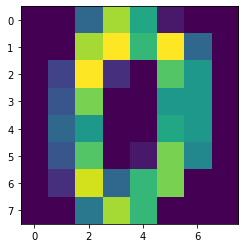

In [6]:
plt.imshow(digits.images[0])

In [7]:
digits.data[0:1]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [8]:
# Create dataset 1
data1_features = digits.data[:1000]
data1_target = digits.target[:1000]

# Create dataset 2
data2_features = digits.data[1000:]
data2_target = digits.target[1000:]

In [9]:
parameter_candidates = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]

In [10]:
# Create a classifier object with the classifier and parameter candidates
clf = GridSearchCV(estimator=svm.SVC(), param_grid=parameter_candidates, n_jobs=-1)

# Train the classifier on data1's feature and target data
clf.fit(data1_features, data1_target)   

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [11]:
# View the accuracy score
print('Best score for data1:', clf.best_score_) 

Best score for data1: 0.966


In [25]:
clf.best_params_

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

In [24]:
from sklearn.decomposition import PCA
import pandas as pd

pca=PCA(n_components=2)


df_pca=pca.fit_transform(data2_features)

df_pca=pd.DataFrame(df_pca,columns=['feat1','feat2'])
predictions=clf.best_estimator_.predict(data2_features)

df_pca['predictions']=predictions
df_pca['real']=data2_target
df_pca.loc[df_pca['predictions']==df_pca['real'],['right']]='yes'
df_pca.loc[df_pca['predictions']!=df_pca['real'],['right']]='no'
len(df_pca[df_pca['predictions']!=df_pca['real']])

24

In [26]:
import altair as alt

alt.Chart(df_pca).mark_point().encode(
x='feat1',
y='feat2',
color='predictions')

alt.Chart(...)

In [28]:
import altair as alt

alt.Chart(df_pca).mark_point().encode(
x='feat1',
y='feat2',
color='real')

alt.Chart(...)

In [29]:
import altair as alt

alt.Chart(df_pca).mark_point().encode(
x='feat1',
y='feat2',
color='right')

alt.Chart(...)